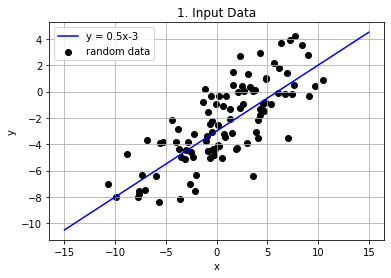

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a = 0.5 #slope
b = -3 #y-intercept
m = 100 #the number of data points
sigma_x = 5
sigma_y = 2 #standard deviation

#input data
data_x = np.random.normal(0.0, sigma_x, size = m)
data_y = np.zeros(m)
for t in range(m):
    data_y[t] = a * data_x[t] + b + np.random.normal(0.0, sigma_y)

#for the straight line
x_line = [x for x in range(-15, 16)]
y_line = [a * y + b for y in range(-15, 16)]

plt.scatter(data_x, data_y, c = 'black')
plt.plot(x_line, y_line, c = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('1. Input Data')
plt.legend(['y = 0.5x-3', 'random data'])
plt.grid()
plt.show()

In [2]:
from sympy import symbols, diff

theta0 = symbols('theta0')
theta1 = symbols('theta1')
sum = 0
for i in range(m):
    sum += (theta0 + theta1 * data_x[i] - data_y[i])**2
j_func = sum / (2*m)

partial0 = diff(j_func, theta0) #partial derivative on theta0
partial1 = diff(j_func, theta1) #partial derivative on theta1


In [3]:
thet0 = 0 #initial theta0
thet1 = 1 #initial theta1
theta0_list = list()
theta1_list = list()

j_value = list()
j_iter = list()
t = 1 #the number of iteration
learning_rate = 0.01
tempj = 0 #temporary value for check convergence

while True:
    if t>1 and abs(tempj - j_func.evalf(subs={theta0: thet0, theta1: thet1})) <= 0.001:
        #print("finish")
        break
    tempj = j_func.evalf(subs={theta0: thet0, theta1: thet1})
    
    j_value.append(tempj)
    j_iter.append(t)
    t += 1
    #print(t , tempj)
    
    theta0_list.append(thet0)
    theta1_list.append(thet1)
    temp0 = thet0 - learning_rate * partial0.evalf(subs={theta0: thet0, theta1: thet1})
    temp1 = thet1 - learning_rate * partial1.evalf(subs={theta0: thet0, theta1: thet1})
    thet0 = temp0
    thet1 = temp1
    #print(thet0, thet1)

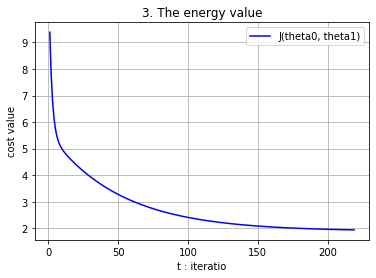

In [4]:
plt.plot(j_iter, j_value, c = 'blue')
plt.xlabel('t : iteratio')
plt.ylabel('cost value')
plt.title('3. The energy value')
plt.legend(['J(theta0, theta1)'])
plt.grid()
plt.show()